# EDA

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### Set all the Constants

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256 

### Import data into tensorflow dataset object

We will use image_dataset_from_directory api to load all images in tensorflow dataset: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Leaf_Data",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 20638 files belonging to 3 classes.


In [4]:
print(f'The Tensorflow has stored dataset of 20638 images into {len(dataset)} batches. With max Batch size {BATCH_SIZE}') 

The Tensorflow has stored dataset of 20638 images into 645 batches. With max Batch size 32


In [5]:
# Lets check for Batch 1 in data set 
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print('We have 32 images of size 256*256 and in rbg(3) format.')
    print('-'*84)
    print(labels_batch.numpy())
    print('Classes/Labels to which these images belong to.')

(32, 256, 256, 3)
We have 32 images of size 256*256 and in rbg(3) format.
------------------------------------------------------------------------------------
[2 2 2 2 1 0 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2]
Classes/Labels to which these images belong to.


As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels 

In [11]:
class_names = dataset.class_names
class_names

['Pepper', 'Potato', 'Tomato']

**Watch below video on tensorflow input pipeline first if you don't know about tensorflow datasets**

In [7]:
pepper_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Leaf_Data/Pepper",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

potato_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Leaf_Data/Potato",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

tomato_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Leaf_Data/Tomato",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2475 files belonging to 2 classes.
Found 2152 files belonging to 3 classes.
Found 16011 files belonging to 10 classes.


In [8]:
pepper_class_names = pepper_data.class_names
potato_class_names = potato_data.class_names
tomato_class_names = tomato_data.class_names
print(f'Category of Plants in PlantVillage dataset:{dataset.class_names}')
print('-'*108,end='\n\n')
print(f'Classes in Pepper plant: {pepper_class_names}\n')
print(f'Classes in Potato plant: {potato_class_names}\n')
print(f'Classes in Tomato plant: {tomato_class_names}')

Category of Plants in PlantVillage dataset:['Pepper', 'Potato', 'Tomato']
------------------------------------------------------------------------------------------------------------

Classes in Pepper plant: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

Classes in Potato plant: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Classes in Tomato plant: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [9]:
pepper_labels = []
for images, labels in pepper_data:
    pepper_labels.extend(labels.numpy())
        
potato_labels = []
for images, labels in potato_data:
    potato_labels.extend(labels.numpy())
        
tomato_labels = []
for images, labels in tomato_data:
    tomato_labels.extend(labels.numpy())

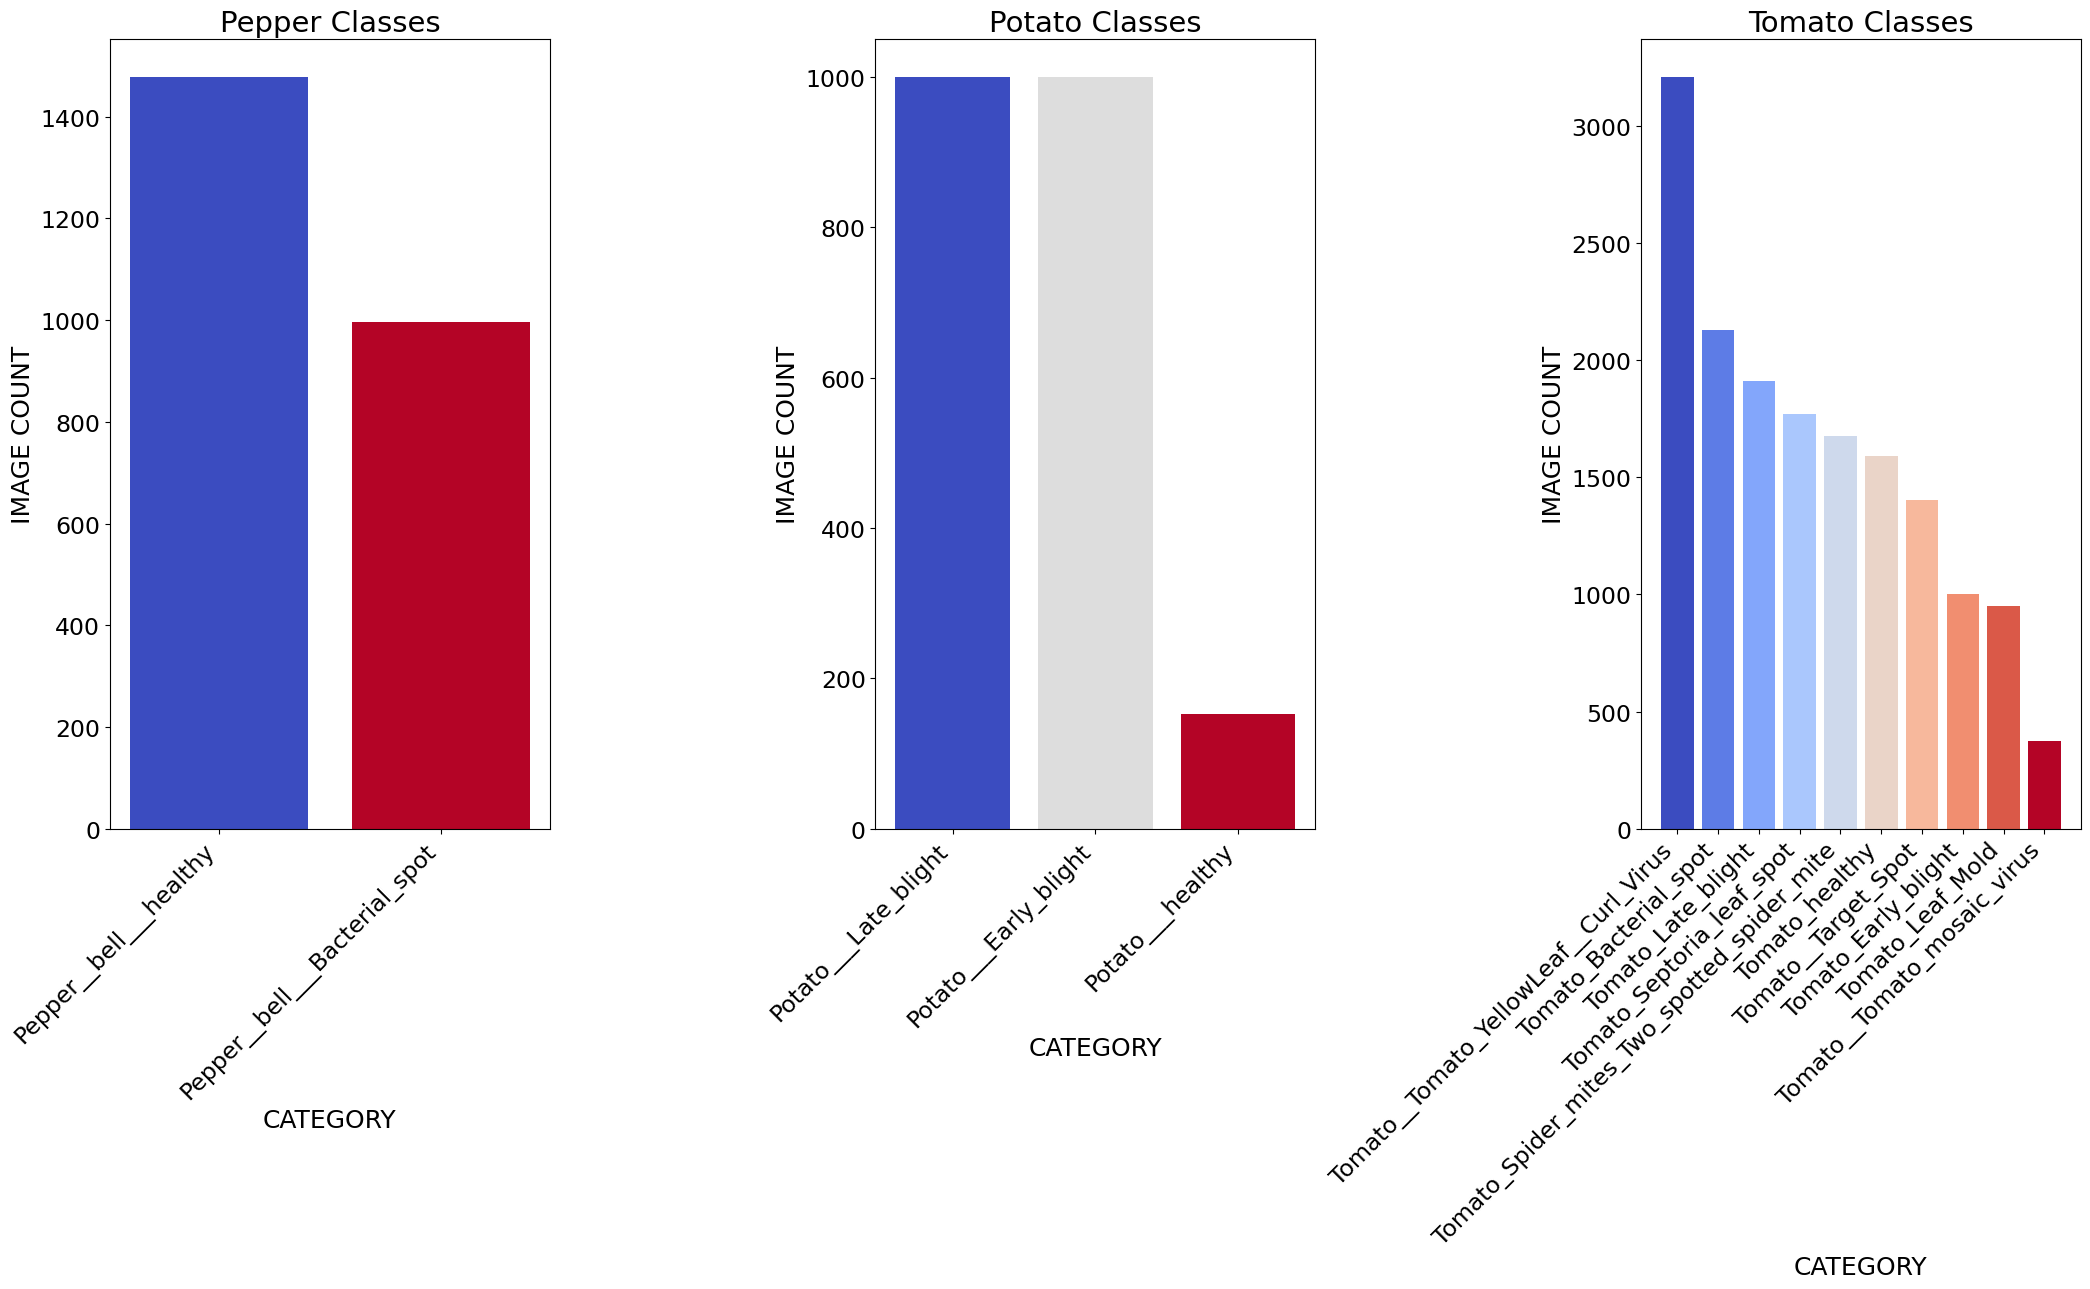

In [10]:
# Function to plot bar plot
def plot_bar_subplot(class_names, labels, subplot_title, subplot_position):
    unique_classes, class_counts = np.unique(labels, return_counts=True)
    sorted_indices = np.argsort(class_counts)[::-1]  # Get indices that sort counts in descending order
    sorted_class_counts = class_counts[sorted_indices]
    sorted_class_names = [class_names[i] for i in sorted_indices]
    
    color_map = plt.get_cmap('coolwarm', len(unique_classes))  # Generate a colormap with distinct colors
    colors = color_map(np.arange(len(unique_classes)))  # Assign different colors
    
    plt.subplot(subplot_position)
    plt.bar(sorted_class_names, sorted_class_counts, color=colors)
    plt.title(subplot_title,size=21)
    plt.xlabel('CATEGORY',size=18)
    plt.ylabel('IMAGE COUNT',size=18)
    plt.xticks(rotation=45, ha='right',size=17)
    plt.yticks(size=17)

# Create subplots for each category
plt.figure(figsize=(21, 13))

plot_bar_subplot(pepper_class_names, pepper_labels, 'Pepper Classes', 131)  # 1st subplot
plot_bar_subplot(potato_class_names, potato_labels, 'Potato Classes', 132)  # 2nd subplot
plot_bar_subplot(tomato_class_names, tomato_labels, 'Tomato Classes', 133)  # 3rd subplot


plt.tight_layout()
plt.show()

### Visualize some of the images from our dataset

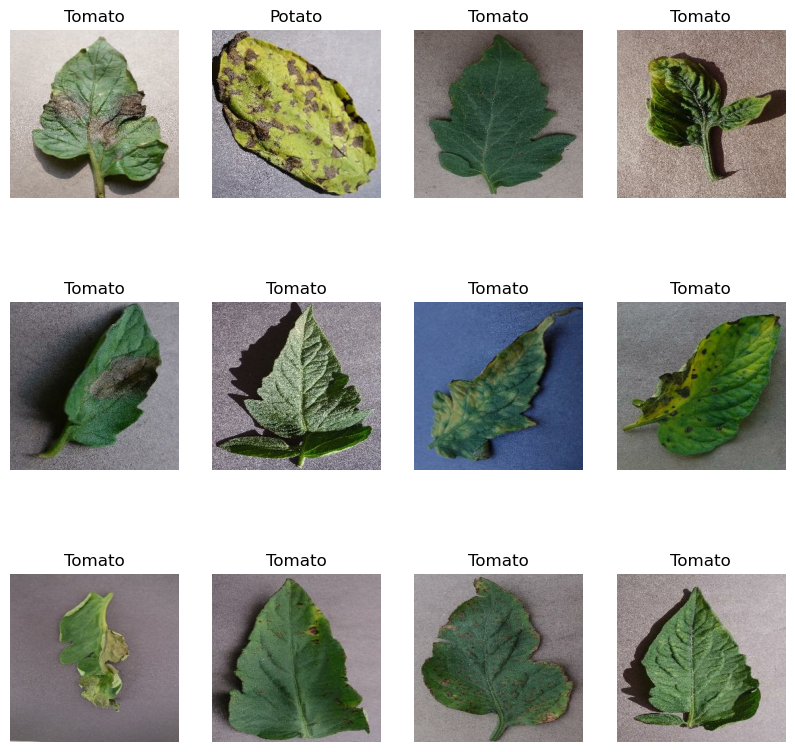

In [12]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")